<a href="https://colab.research.google.com/github/guilimadev/Volleyball-Game-Win-Predictor/blob/main/Volleyball_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from google.colab import drive

drive.mount('/content/gdrive')


Mounted at /content/gdrive


In [2]:
import warnings

warnings.filterwarnings("ignore")

In [3]:
df_vnl = pd.read_csv('gdrive/My Drive/Colab Notebooks/csv/vnl_2021_preliminaryround_mens.csv',index_col=1)
df_vnl = df_vnl.drop('Unnamed: 0', axis=1)

In [4]:
df_vnl.index.names = ['id_jogo']


In [5]:
df_vnl = df_vnl.rename(columns={'qts sets': 'qtd sets'})
df_vnl.head()

,team home,total atq home,pontos ataques home,atq error home,% atq home,% rec home,bloqueio home,server error home,team away,total atq away,pontos ataques away,atq error away,% atq away,% rec away,bloqueio away,server error away,qtd sets,vencedor
id_jogo,,,,,,,,,,,,,,,,,,
11700,France,77,39,8,51,44,7,19,Bulgaria,76,36,15,47,39,5,17,3,True
11701,Germany,70,42,6,60,35,5,19,Australia,61,28,9,46,25,3,15,3,True
11702,Japan,94,45,13,48,50,7,7,Iran,84,41,12,49,46,8,16,3,True
11703,Serbia,121,66,19,55,33,14,19,Slovenia,111,53,21,48,30,9,17,4,True
11704,Netherlands,89,49,14,55,20,6,18,Russia,94,51,11,54,29,10,18,4,False


In [6]:
df_sla = pd.read_csv('gdrive/My Drive/Colab Notebooks/csv/Superliga_2021.csv', index_col=0)
df_sla.head()


,team home,total atq home,pontos ataques home,atq error home,% atq home,% rec home,bloqueio home,server error home,team away,total atq away,pontos ataques away,atq error away,% atq away,% rec away,bloqueio away,server error away,qtd sets,vencedor
id_jogo,,,,,,,,,,,,,,,,,,
1239,MONTES CLAROS AMERICA VOLEI,102,41,9,40,59,14,14,BRASILIA VÔLEI,101,39,13,39,76,14,16,4,True
1240,VOLEI FUNVIC NATAL,59,33,6,56,59,11,13,GOIÁS VÔLEI,61,18,13,30,48,6,8,3,True
1241,VOLEI RENATA,123,57,11,46,64,15,21,SESI-SP,138,58,12,42,66,13,18,5,False
1242,VEDACIT VÔLEI GUARULHOS,102,54,16,53,53,7,17,FIAT/GERDAU/MINAS,103,54,10,52,59,7,14,4,False
1243,SADA CRUZEIRO,76,42,5,55,52,5,12,FARMA CONDE VÔLEI - SÃO JOSÉ,82,39,7,48,49,4,13,3,True


In [7]:
df_merged = pd.concat([df_vnl, df_sla])


In [8]:
df_merged['qtd sets'].describe

<bound method NDFrame.describe of id_jogo
11700    3
11701    3
11702    3
11703    4
11704    4
        ..
1305     3
1306     4
1307     3
1308     3
1309     3
Name: qtd sets, Length: 185, dtype: int64>

In [9]:
df_merged.shape

(185, 18)

In [10]:
df_merged['total atq home'] = df_merged['total atq home'] / df_merged['qtd sets']
df_merged['pontos ataques home'] = df_merged['pontos ataques home'] / df_merged['qtd sets']
df_merged['atq error home'] = df_merged['atq error home'] / df_merged['qtd sets']
df_merged['bloqueio home'] = df_merged['bloqueio home'] / df_merged['qtd sets']
df_merged['server error home'] = df_merged['server error home'] / df_merged['qtd sets']
df_merged['total atq away'] = df_merged['total atq away'] / df_merged['qtd sets']
df_merged['pontos ataques away'] = df_merged['pontos ataques away'] / df_merged['qtd sets']
df_merged['atq error away'] = df_merged['atq error away'] / df_merged['qtd sets']
df_merged['bloqueio away'] = df_merged['bloqueio away'] / df_merged['qtd sets']
df_merged['server error away'] = df_merged['server error away'] / df_merged['qtd sets']

In [11]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.tree import export_graphviz
from sklearn import metrics
X = df_merged.drop(columns=['team home', 'team away', 'vencedor', 'qtd sets'])
y = df_merged['vencedor']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

model = RandomForestClassifier(min_samples_leaf=10, min_samples_split=2,n_estimators=100)
model.fit(X_train, y_train)
estimator = model.estimators_[5]


y_pred = model.predict(X_test)

scores = cross_val_score(model, X, y, cv=2)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Score: " , scores.mean())


Accuracy: 0.9107142857142857
Score:  0.805341280972417


In [12]:
export_graphviz(estimator, 
                out_file='tree.dot', 
                feature_names = X.columns,                
                rounded = True, proportion = False, 
                precision = 2, filled = True)

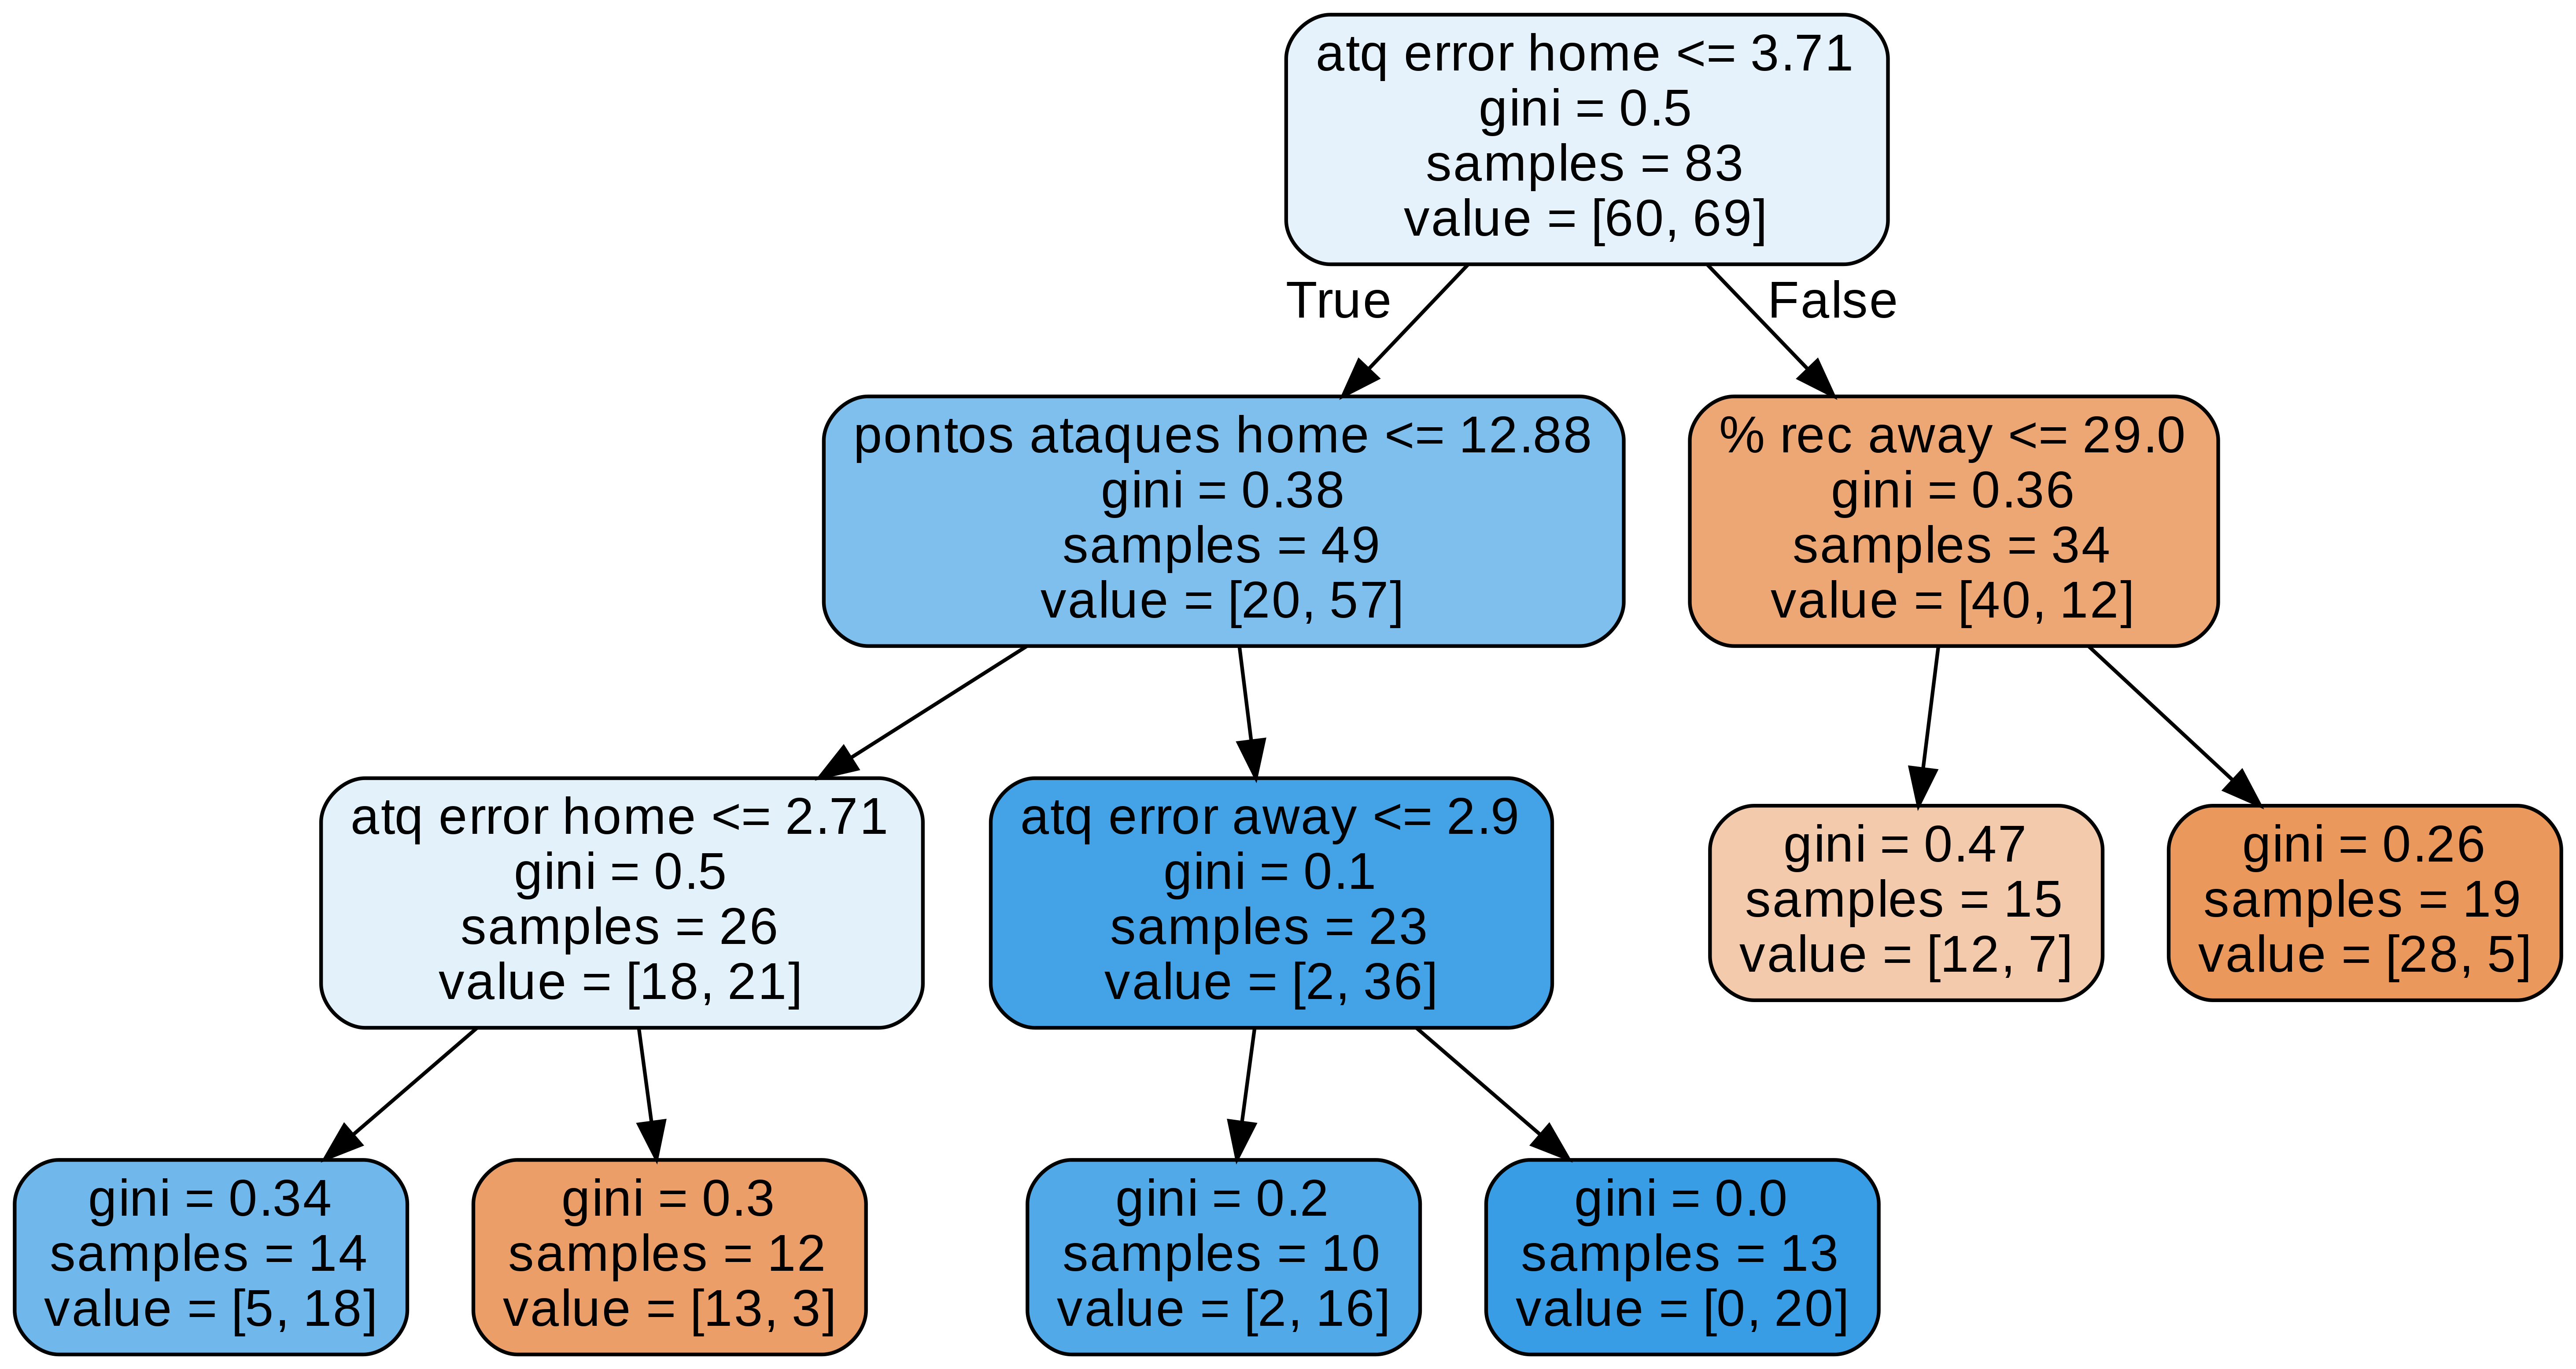

In [13]:
from subprocess import call
from IPython.display import Image
call(['dot','-Tpng','tree.dot','-o','tree.png','-Gdpi=600'])
Image(filename='tree.png')

In [14]:
df_merged.head()
df_splitted_away = df_merged[['team away','total atq away','pontos ataques away','atq error away','% atq away','% rec away','bloqueio away','server error away','vencedor']]
cols = ['team', 'total atq', 'pontos ataque', 'atq error', '% atq', '% rec', 'bloqueio', 'server error','vencedor']
df_splitted_away.columns = cols
df_splitted2 = df_merged[['team home','total atq home','pontos ataques home','atq error home','% atq home','% rec home','bloqueio home','server error home','vencedor']]
df_splitted2.columns = cols
df_splitted2.head()

,team,total atq,pontos ataque,atq error,% atq,% rec,bloqueio,server error,vencedor
id_jogo,,,,,,,,,
11700,France,25.666667,13.00,2.666667,51,44,2.333333,6.333333,True
11701,Germany,23.333333,14.00,2.000000,60,35,1.666667,6.333333,True
11702,Japan,31.333333,15.00,4.333333,48,50,2.333333,2.333333,True
11703,Serbia,30.250000,16.50,4.750000,55,33,3.500000,4.750000,True
11704,Netherlands,22.250000,12.25,3.500000,55,20,1.500000,4.500000,False


In [15]:
df_splitted_away['vencedor'] = ~df_splitted_away['vencedor']


In [16]:
df_splitted_away.tail()

,team,total atq,pontos ataque,atq error,% atq,% rec,bloqueio,server error,vencedor
id_jogo,,,,,,,,,
1305,AZULIM/GABARITO/UBERLANDIA,24.666667,12.000000,3.333333,49,56,0.666667,3.333333,False
1306,VOLEI RENATA,19.750000,12.250000,2.500000,62,66,1.750000,3.250000,True
1307,APAN/ELEVA,23.333333,9.000000,1.666667,39,53,1.000000,4.333333,False
1308,MONTES CLAROS AMERICA VOLEI,24.666667,13.666667,2.666667,55,73,2.333333,3.000000,True
1309,VEDACIT VÔLEI GUARULHOS,22.333333,9.333333,3.333333,42,44,2.000000,3.333333,False


In [17]:
frames = [df_splitted_away, df_splitted2]
df_merged2 = pd.concat(frames)

df_merged2[['team']]

,team
id_jogo,
11700,Bulgaria
11701,Australia
11702,Iran
11703,Slovenia
11704,Russia
...,...
1305,GOIÁS VÔLEI
1306,BRASILIA VÔLEI
1307,FIAT/GERDAU/MINAS


In [22]:
home = df_merged2.loc[df_merged2['team'] == 'Slovenia']
home_medias = [round(home['total atq'].mean()),round(home['pontos ataque'].mean()),round(home['atq error'].mean()),round(home['% atq'].mean()),round(home['% rec'].mean()),round(home['bloqueio'].mean()),round(home['server error'].mean())]
home_medias

[26, 13, 3, 52, 33, 2, 4]

In [23]:
away = df_merged2.loc[df_merged2['team'] == 'Argentina']
away_medias = [round(away['total atq'].mean()),round(away['pontos ataque'].mean()),round(away['atq error'].mean()),round(away['% atq'].mean()),round(away['% rec'].mean()),round(away['bloqueio'].mean()),round(away['server error'].mean())]
away_medias

[26, 13, 5, 52, 29, 2, 4]

In [24]:
resultado =  home_medias + away_medias
resultado_final = np.array(resultado)
resultado_final

array([26, 13,  3, 52, 33,  2,  4, 26, 13,  5, 52, 29,  2,  4])

In [25]:
resultado_chance = model.predict_proba(resultado_final.reshape(1,-1))
resultado_home_porcetagem = round(resultado_chance[0][1] * 100, 2)
resultado_away_porcetagem =  round(resultado_chance[0][0] * 100, 2)
print('Chances do time',home['team'].iloc[0] ,'vencer:',str(resultado_home_porcetagem)+'%\n'+'Chances do time',away['team'].iloc[0] ,'vencer:',str(resultado_away_porcetagem)+'%')

Chances do time Slovenia vencer: 56.23%
Chances do time Argentina vencer: 43.77%


In [ ]:
#@title
import xgboost as xgb
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from pandas.plotting import scatter_matrix
from IPython.display import display
%matplotlib inline


In [ ]:
#@title


# Shuffle and split the dataset into training and testing set.
X_train, X_test, y_train, y_test = train_test_split(X.values, y.values, 
                                                    test_size = 50,
                                                    random_state = 2,
                                                    stratify = y)

In [ ]:
#@title
from time import time 
from sklearn.metrics import f1_score
def train_classifier(clf, X_train, y_train):
    ''' Fits a classifier to the training data. '''
    
    # Start the clock, train the classifier, then stop the clock
    start = time()
    clf.fit(X_train, y_train)
    end = time()
    
    # Print the results
    print(("Trained model in {:.4f} seconds.").format(end - start))

    
def predict_labels(clf, features, target):
    ''' Makes predictions using a fit classifier based on F1 score. '''
    
    # Start the clock, make predictions, then stop the clock
    start = time()
    y_pred = clf.predict(features)
    
    end = time()
    # Print and return results
    print(("Made predictions in {:.4f} seconds").format(end - start))
    
    return f1_score(target, y_pred,), sum(target == y_pred) / float(len(y_pred))


def train_predict(clf, X_train, y_train, X_test, y_test):
    ''' Train and predict using a classifer based on F1 score. '''
    
    # Indicate the classifier and the training set size
    print(("Training a {} using a training set size of {}. . .").format(clf.__class__.__name__, len(X_train)))
    
    # Train the classifier
    train_classifier(clf, X_train, y_train)
    
    # Print the results of prediction for both training and testing
    f1, acc = predict_labels(clf, X_train, y_train)
    print(f1, acc)
    print(("F1 score and accuracy score for training set: {:.4f} , {:.4f}").format(f1 , acc))
    
    f1, acc = predict_labels(clf, X_test, y_test)
    print(("F1 score and accuracy score for test set: {:.4f} , {:.4f}.").format(f1 , acc))

In [ ]:
#@title
clf_A = LogisticRegression(random_state = 42)
clf_B = SVC(random_state = 912, kernel='rbf')
#Boosting refers to this general problem of producing a very accurate prediction rule 
#by combining rough and moderately inaccurate rules-of-thumb
clf_C = xgb.XGBClassifier(seed = 82)
train_predict(clf_A, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_B, X_train, y_train, X_test, y_test)
print('')
train_predict(clf_C, X_train, y_train, X_test, y_test)
print('')

Training a LogisticRegression using a training set size of 135. . .
Trained model in 0.0221 seconds.
Made predictions in 0.0002 seconds
0.9722222222222222 0.9703703703703703
F1 score and accuracy score for training set: 0.9722 , 0.9704
Made predictions in 0.0001 seconds
F1 score and accuracy score for test set: 0.8980 , 0.9000.

Training a SVC using a training set size of 135. . .
Trained model in 0.0017 seconds.
Made predictions in 0.0012 seconds
0.8701298701298701 0.8518518518518519
F1 score and accuracy score for training set: 0.8701 , 0.8519
Made predictions in 0.0014 seconds
F1 score and accuracy score for test set: 0.7407 , 0.7200.

Training a XGBClassifier using a training set size of 135. . .
Trained model in 0.0242 seconds.
Made predictions in 0.0013 seconds
1.0 1.0
F1 score and accuracy score for training set: 1.0000 , 1.0000
Made predictions in 0.0005 seconds
F1 score and accuracy score for test set: 0.8235 , 0.8200.



In [ ]:
#@title
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer
parameters = { 'learning_rate' : [0.1],
               'n_estimators' : [40],
               'max_depth': [3],
               'min_child_weight': [3],
               'gamma':[0.4],
               'subsample' : [0.8],
               'colsample_bytree' : [0.8],
               'scale_pos_weight' : [1],
               'reg_alpha':[1e-5]
             }  

clf_final = xgb.XGBClassifier(seed=2)

f1_scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf_final,
                        scoring=f1_scorer,
                        param_grid=parameters,
                        cv=5)
grid_obj.fit(X_train, y_train)
clf_final = grid_obj.best_estimator_

f1, acc = predict_labels(clf_final, X_train, y_train)
print(("F1 score and accuracy score for training set: {:.4f} , {:.4f}.").format(f1 , acc))

Made predictions in 0.0004 seconds
F1 score and accuracy score for training set: 0.9655 , 0.9630.


In [ ]:
#@title
home = df_merged2.loc[df_merged2['team'] == 'Brazil']
home_medias = [round(home['total atq'].mean()),round(home['pontos ataque'].mean()),round(home['atq error'].mean()),round(home['% atq'].mean()),round(home['% rec'].mean()),round(home['bloqueio'].mean()),round(home['server error'].mean())]
home_medias

[27, 14, 4, 53, 33, 2, 4]

In [ ]:
#@title
away = df_merged2.loc[df_merged2['team'] == 'Russia']
away_medias = [round(away['total atq'].mean()),round(away['pontos ataque'].mean()),round(away['atq error'].mean()),round(away['% atq'].mean()),round(away['% rec'].mean()),round(away['bloqueio'].mean()),round(away['server error'].mean())]
away_medias

[25, 13, 3, 53, 18, 3, 5]

In [ ]:
#@title
resultado =  home_medias + away_medias
resultado_final = np.array(resultado)
resultado_final

array([27, 14,  4, 53, 33,  2,  4, 25, 13,  3, 53, 18,  3,  5])

In [ ]:
#@title
resultado_chance = clf_final.predict_proba(resultado_final.reshape(1,-1))
resultado_home_porcetagem = round(resultado_chance[0][1] * 100, 2)
resultado_away_porcetagem =  round(resultado_chance[0][0] * 100, 2)
print('Chances do time',home['team'].iloc[0] ,'vencer:',str(resultado_home_porcetagem)+'%\n'+'Chances do time',away['team'].iloc[0] ,'vencer:',str(resultado_away_porcetagem)+'%')

Chances do time Brazil vencer: 40.03%
Chances do time Russia vencer: 59.97%


In [ ]:
#@title
clf_final.classes_

array([False,  True])